<a href="https://www.kaggle.com/code/sohaelshafey/world-data-population-eda-and-prediction?scriptVersionId=158429548" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/world-population-data/world_population_data.csv


# Load Data

In [2]:
df = pd.read_csv('/kaggle/input/world-population-data/world_population_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rank              234 non-null    int64  
 1   cca3              234 non-null    object 
 2   country           234 non-null    object 
 3   continent         234 non-null    object 
 4   2023 population   234 non-null    int64  
 5   2022 population   234 non-null    int64  
 6   2020 population   234 non-null    int64  
 7   2015 population   234 non-null    int64  
 8   2010 population   234 non-null    int64  
 9   2000 population   234 non-null    int64  
 10  1990 population   234 non-null    int64  
 11  1980 population   234 non-null    int64  
 12  1970 population   234 non-null    int64  
 13  area (km²)        234 non-null    float64
 14  density (km²)     234 non-null    int64  
 15  growth rate       234 non-null    object 
 16  world percentage  234 non-null    object 
dt

# Statistics

In [3]:
#Check nulls and unique values
for col in df.columns:
    print("column",col,"null values:",df[col].isnull().sum())
    print("column",col,"uniques counts:",df[col].nunique())
    print("------------------------------------------------")

column rank null values: 0
column rank uniques counts: 234
------------------------------------------------
column cca3 null values: 0
column cca3 uniques counts: 234
------------------------------------------------
column country null values: 0
column country uniques counts: 234
------------------------------------------------
column continent null values: 0
column continent uniques counts: 6
------------------------------------------------
column 2023 population null values: 0
column 2023 population uniques counts: 234
------------------------------------------------
column 2022 population null values: 0
column 2022 population uniques counts: 234
------------------------------------------------
column 2020 population null values: 0
column 2020 population uniques counts: 234
------------------------------------------------
column 2015 population null values: 0
column 2015 population uniques counts: 234
------------------------------------------------
column 2010 population null values

# Preprocess

In [4]:
df['growth rate']=df['growth rate'].apply(lambda x:x.replace('%',''))
df['world percentage']=df['world percentage'].apply(lambda x:x.replace('%',''))
df['growth rate']=df['growth rate'].astype(float)
df['world percentage']=df['world percentage'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rank              234 non-null    int64  
 1   cca3              234 non-null    object 
 2   country           234 non-null    object 
 3   continent         234 non-null    object 
 4   2023 population   234 non-null    int64  
 5   2022 population   234 non-null    int64  
 6   2020 population   234 non-null    int64  
 7   2015 population   234 non-null    int64  
 8   2010 population   234 non-null    int64  
 9   2000 population   234 non-null    int64  
 10  1990 population   234 non-null    int64  
 11  1980 population   234 non-null    int64  
 12  1970 population   234 non-null    int64  
 13  area (km²)        234 non-null    float64
 14  density (km²)     234 non-null    int64  
 15  growth rate       234 non-null    float64
 16  world percentage  234 non-null    float64
dt

# Grouping EDAs by Continents

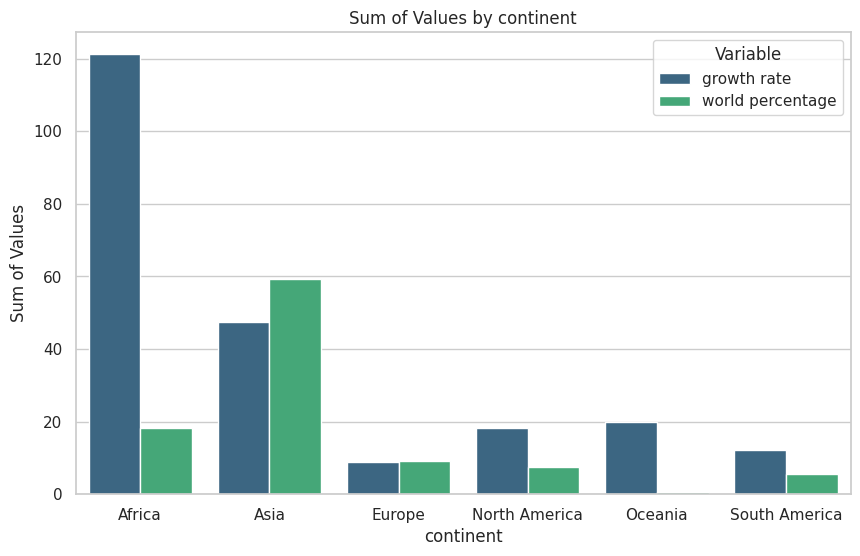

In [5]:
# Group by continent
grouped_df = df.groupby('continent').agg({'growth rate': 'sum', 'world percentage': 'sum'}).reset_index()

# Melt the DataFrame to make it suitable for Seaborn
melted_df = pd.melt(grouped_df, id_vars='continent', var_name='Variable', value_name='Sum')

# Create a Seaborn bar plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='continent', y='Sum', hue='Variable', data=melted_df, palette='viridis')
plt.title('Sum of Values by continent')
plt.xlabel('continent')
plt.ylabel('Sum of Values')
plt.show()


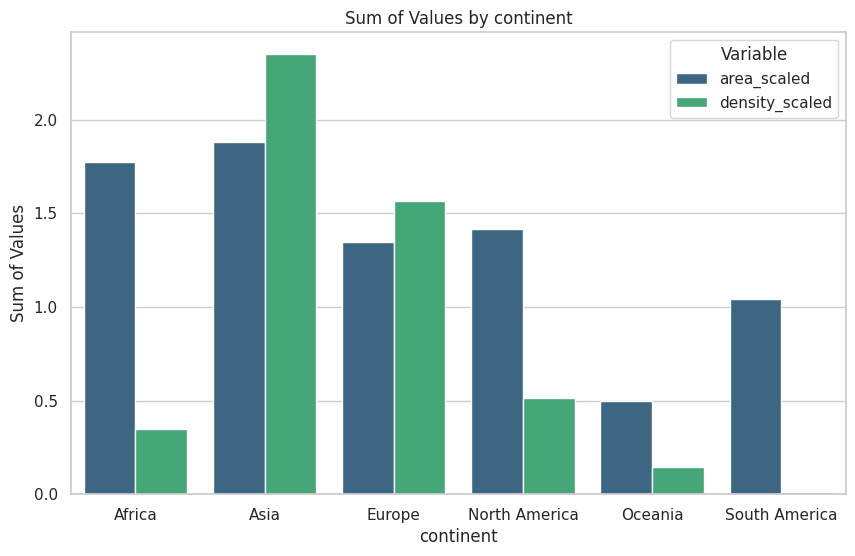

In [6]:
# Select columns to scale
columns_to_scale = ['area (km²)', 'density (km²)']

# Scale the selected columns
scaler = MinMaxScaler()
df[['area_scaled','density_scaled']] = scaler.fit_transform(df[columns_to_scale])


# Group by continent
grouped_df = df.groupby('continent').agg({'area_scaled': 'sum', 'density_scaled': 'sum'}).reset_index()

# Melt the DataFrame to make it suitable for Seaborn
melted_df = pd.melt(grouped_df, id_vars='continent', var_name='Variable', value_name='Sum')

# Create a Seaborn bar plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='continent', y='Sum', hue='Variable', data=melted_df, palette='viridis')
plt.title('Sum of Values by continent')
plt.xlabel('continent')
plt.ylabel('Sum of Values')
plt.show()

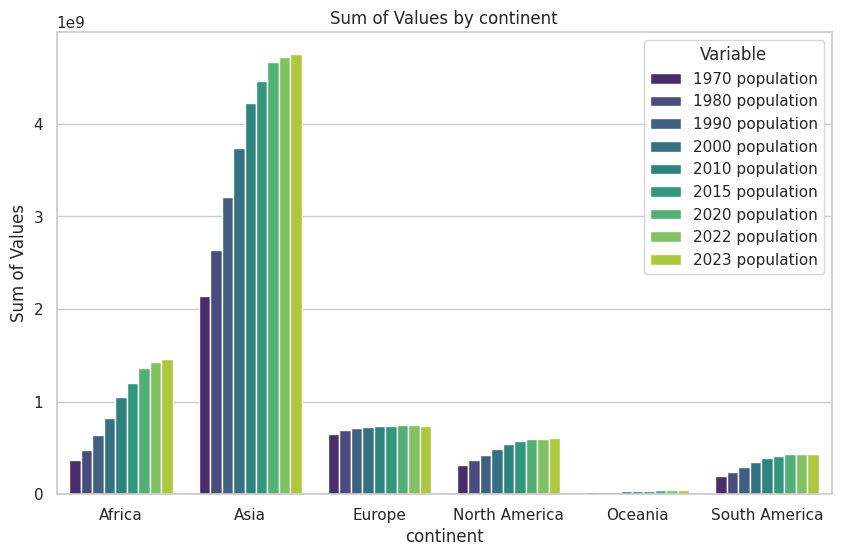

In [7]:
# Group by continent
grouped_df = df.groupby('continent').agg({'1970 population':'sum','1980 population':'sum', '1990 population':'sum',
                                            '2000 population':'sum','2010 population':'sum', '2015 population':'sum'
                                           , '2020 population':'sum','2022 population':'sum','2023 population':'sum'}).reset_index()

# Melt the DataFrame to make it suitable for Seaborn
melted_df = pd.melt(grouped_df, id_vars='continent', var_name='Variable', value_name='Sum')

# Create a Seaborn bar plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='continent', y='Sum', hue='Variable', data=melted_df, palette='viridis')
plt.title('Sum of Values by continent')
plt.xlabel('continent')
plt.ylabel('Sum of Values')
plt.show()

# Countries EDAs

In [8]:
df["continent"].unique().tolist()

['Asia', 'North America', 'Africa', 'South America', 'Europe', 'Oceania']

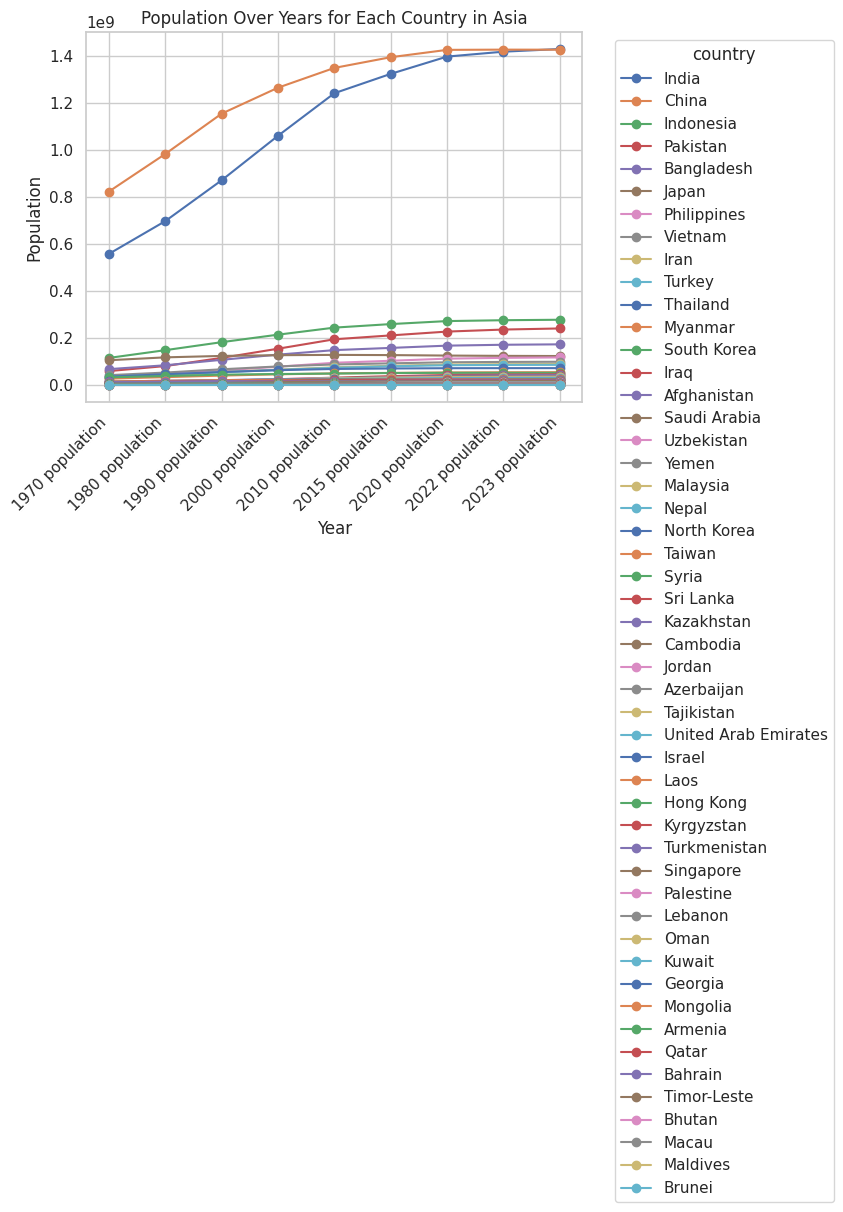

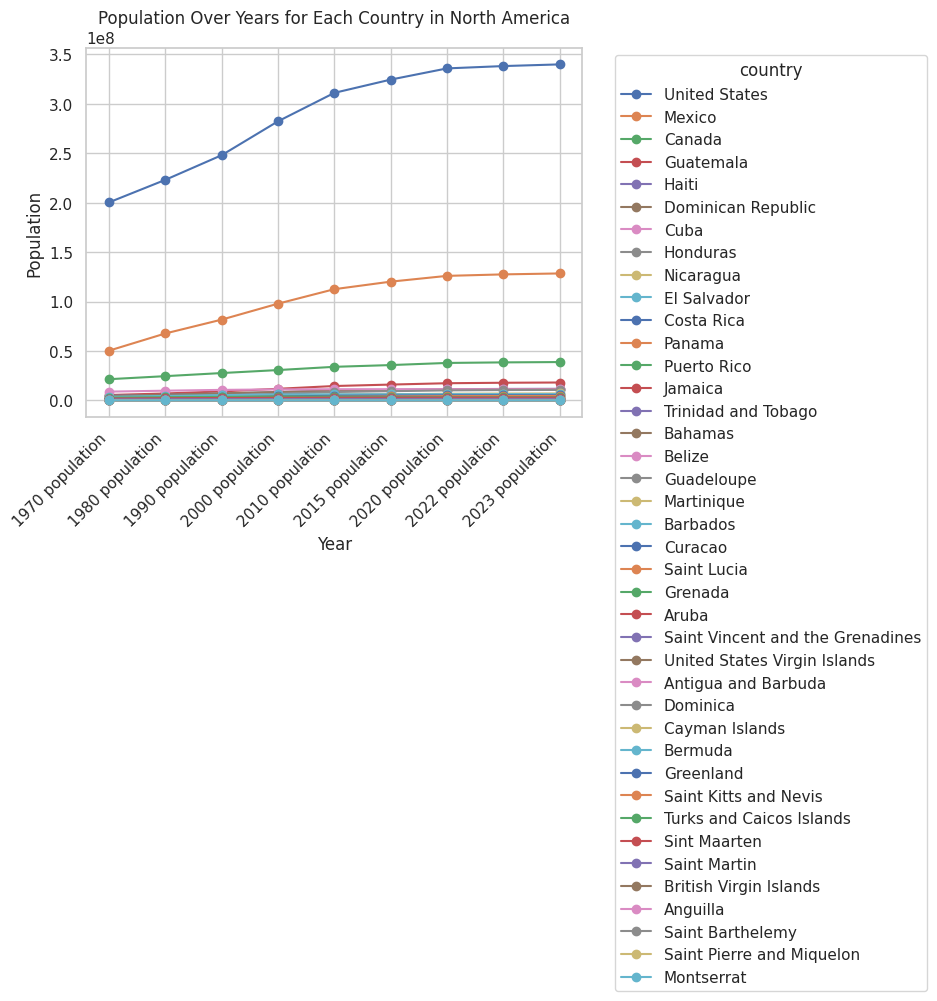

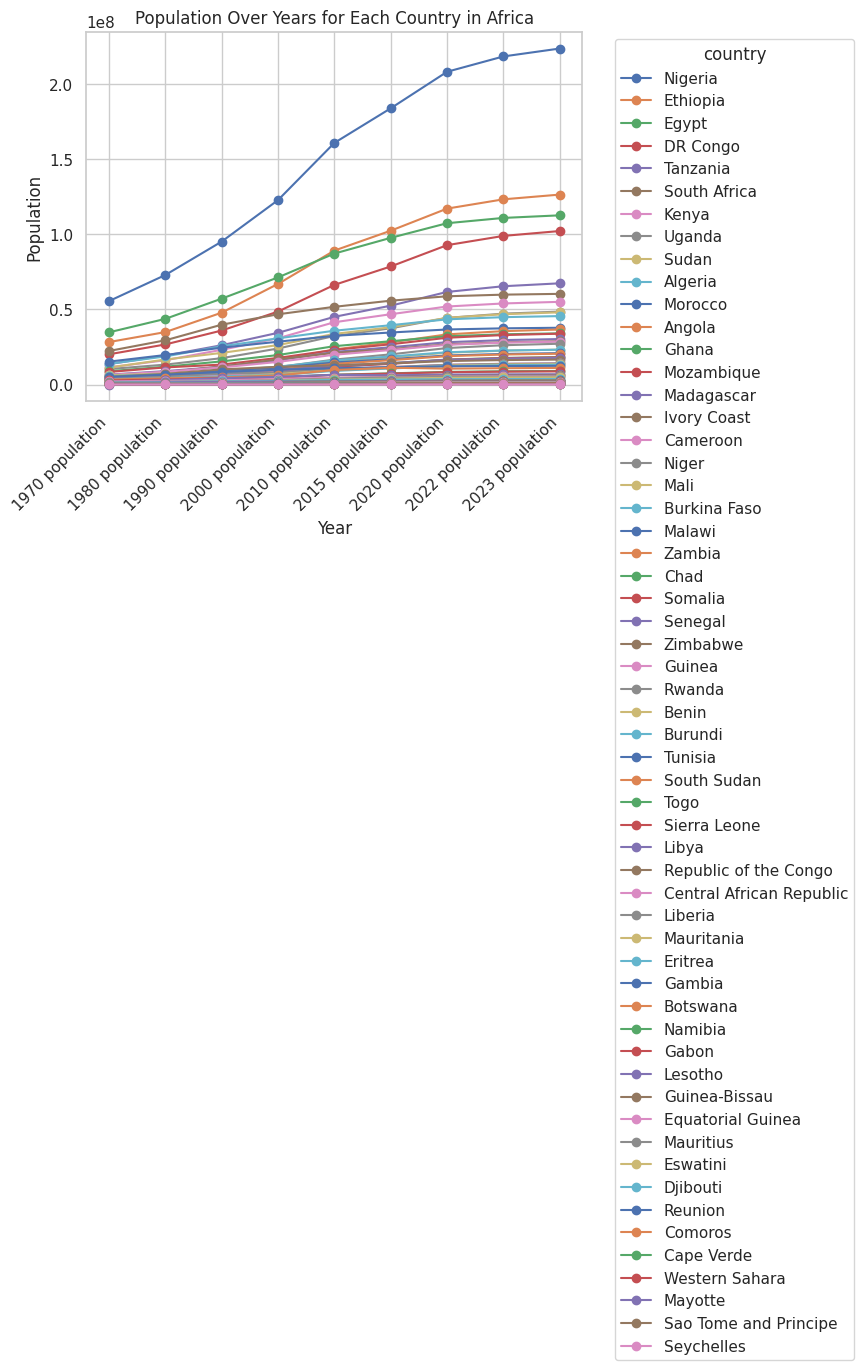

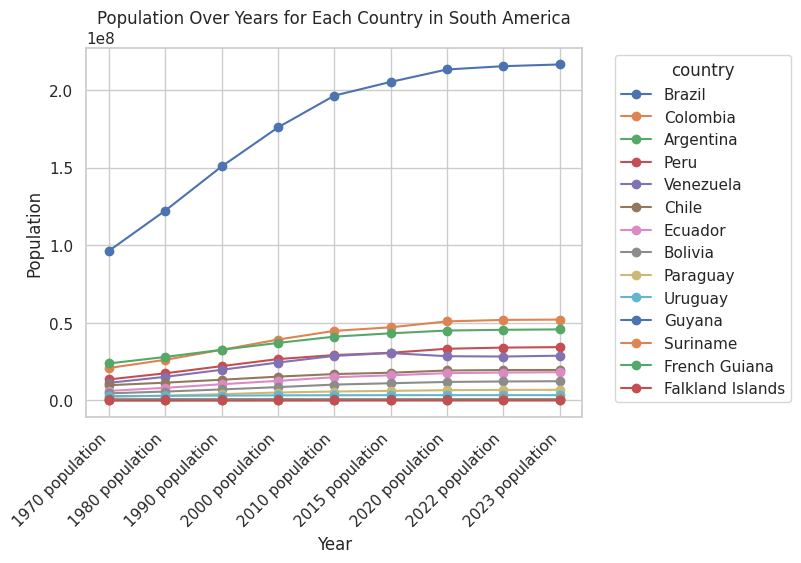

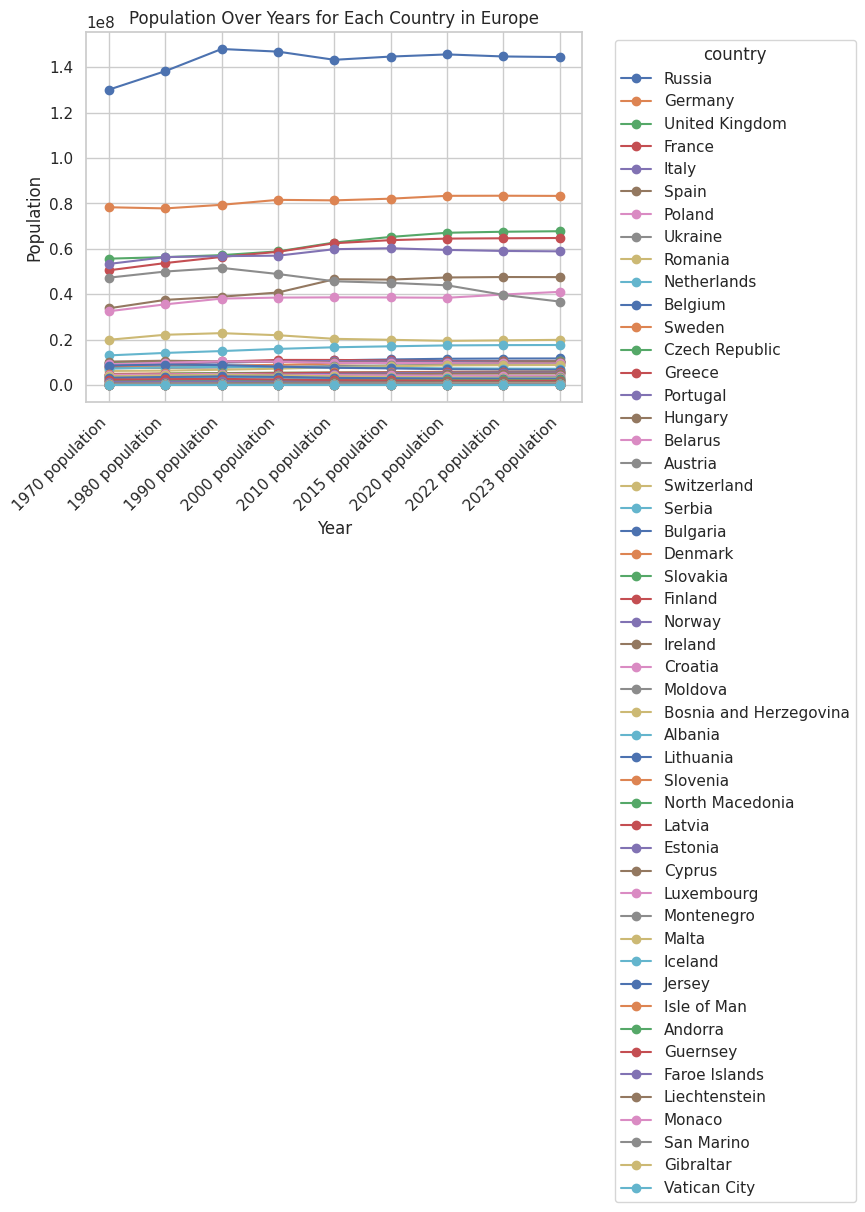

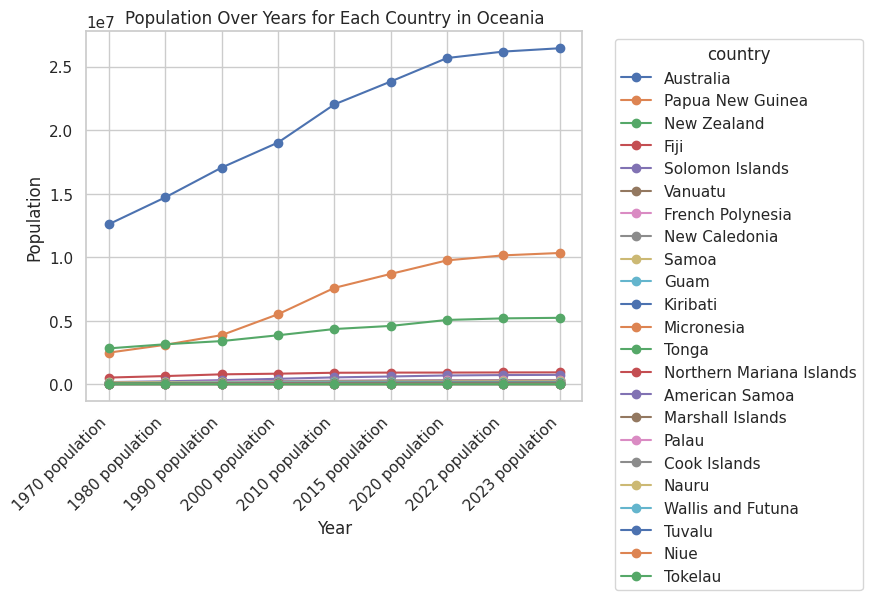

In [9]:
for cont in df["continent"].unique().tolist():
    grouped_df = df[df['continent']==cont][['country', '1970 population','1980 population', '1990 population',
                                            '2000 population','2010 population', '2015 population'
                                           , '2020 population','2022 population','2023 population']]
    # Set 'Country' column as the index for better plotting
    grouped_df.set_index('country', inplace=True)

    # Plot each row (country) as a line plot
    grouped_df.T.plot(kind='line', marker='o')

    # Set plot labels and title
    plt.xlabel('Year')
    plt.ylabel('Population')
    plt.title('Population Over Years for Each Country in '+ cont)
    plt.xticks(rotation=45, ha='right') 

    # Show the legend
    plt.legend(title='country', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

# Scaling Data

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df[[ '2023 population','2022 population', '2020 population', '2015 population',
                                       '2010 population', '2000 population', '1990 population',                                       
                                       '1980 population', '1970 population', 'area (km²)', 'density (km²)',
                                       'growth rate', 'world percentage']] = scaler.fit_transform(df[[ '2023 population','2022 population', '2020 population', '2015 population',
                                       '2010 population', '2000 population', '1990 population',                                       
                                       '1980 population', '1970 population', 'area (km²)', 'density (km²)',
                                       'growth rate', 'world percentage']])

# Linear Regression for 2024 & 2025 predictions

In [11]:
# Select relevant columns for prediction 
features = ['1970 population','1980 population', '1990 population','2000 population','2010 population', 
            '2015 population','2020 population','2022 population','2023 population']
# Specify the number of future years to predict
num_future_years = 2

scaler = MinMaxScaler()
new_f=[]
# Create target variables (y) for the specified future years
for i in range(1, num_future_years + 1):
    target_variable = f'y_{i}'
    df[target_variable] = df.iloc[:, 4].shift(-i)  # Shifting the population values by i years
    df[[target_variable]]=scaler.fit_transform(df[[target_variable]])
    features.extend([target_variable])
    new_f.append(target_variable)



# Drop rows with NaN values in the target variables
df = df.dropna()

# Features (X) exclude the target variables
X = df.iloc[:, 4:][features] # Exclude the first 4 columns

# Target variables (y) for the specified future years
y = df[[f'y_{i}' for i in range(1, num_future_years + 1)]]


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Mean Squared Error: 2.839226842108072e-33


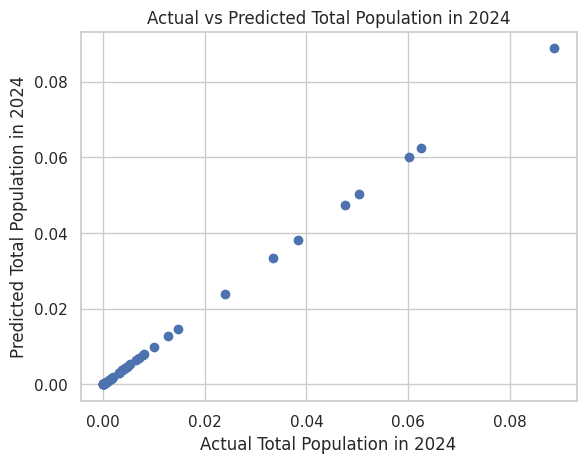

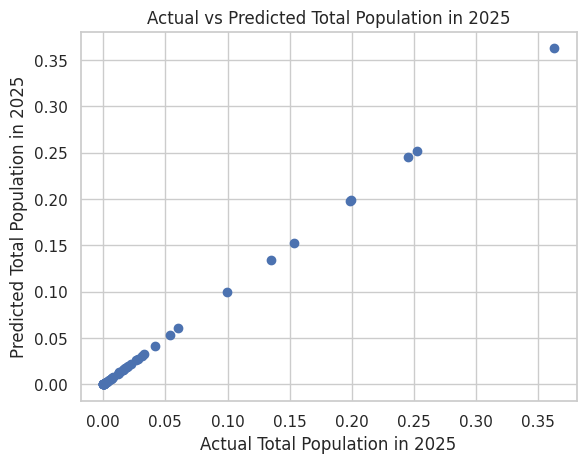

In [12]:
# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions for the test set
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Visualize actual vs predicted values for each future year
for i in range(1, num_future_years + 1):
    plt.scatter(y_test[f'y_{i}'], predictions[:, i - 1])
    plt.xlabel(f'Actual Total Population in {2023 + i}')
    plt.ylabel(f'Predicted Total Population in {2023 + i}')
    plt.title(f'Actual vs Predicted Total Population in {2023 + i}')
    plt.show()

In [13]:
# Make predictions for the test set
predictions = model.predict(X)
# Inverse transform the scaled predictions to get actual values
df[new_f]=predictions
grouped_df = df.groupby('continent').agg({'1970 population':'sum','1980 population':'sum', '1990 population':'sum',
                                            '2000 population':'sum','2010 population':'sum', '2015 population':'sum'
                                           , '2020 population':'sum','2022 population':'sum','2023 population':'sum'}).reset_index()

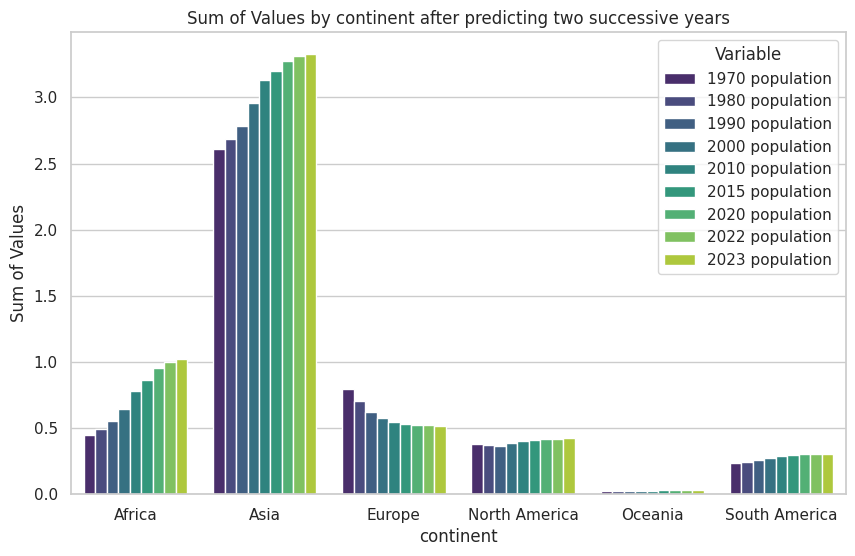

In [14]:
# Melt the DataFrame to make it suitable for Seaborn
melted_df = pd.melt(grouped_df, id_vars='continent', var_name='Variable', value_name='Sum')

# Create a Seaborn bar plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='continent', y='Sum', hue='Variable', data=melted_df, palette='viridis')
plt.title('Sum of Values by continent after predicting two successive years')
plt.xlabel('continent')
plt.ylabel('Sum of Values')
plt.show()

# RandomForest Regressor

Mean Squared Error: 9.246449413348166e-06


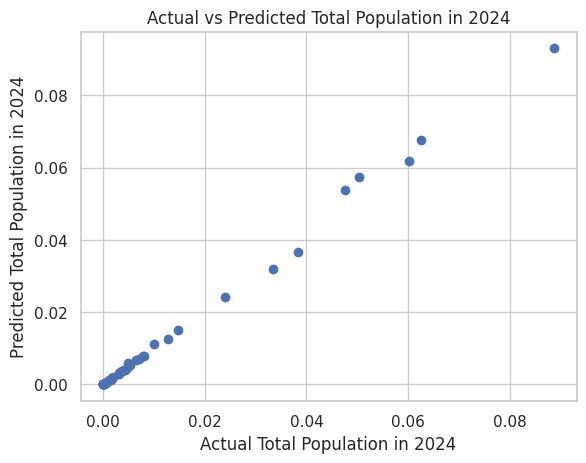

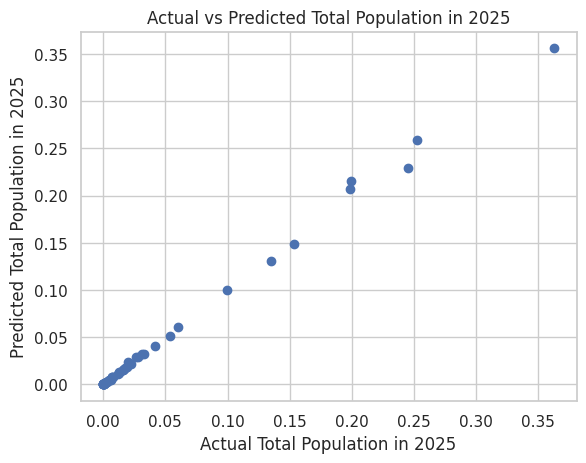

In [15]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=10, random_state=42)
model.fit(X_train, y_train)

# Make predictions for the test set
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Visualize actual vs predicted values for each future year
for i in range(1, num_future_years + 1):
    plt.scatter(y_test[f'y_{i}'], predictions[:, i - 1])
    plt.xlabel(f'Actual Total Population in {2023 + i}')
    plt.ylabel(f'Predicted Total Population in {2023 + i}')
    plt.title(f'Actual vs Predicted Total Population in {2023 + i}')
    plt.show()

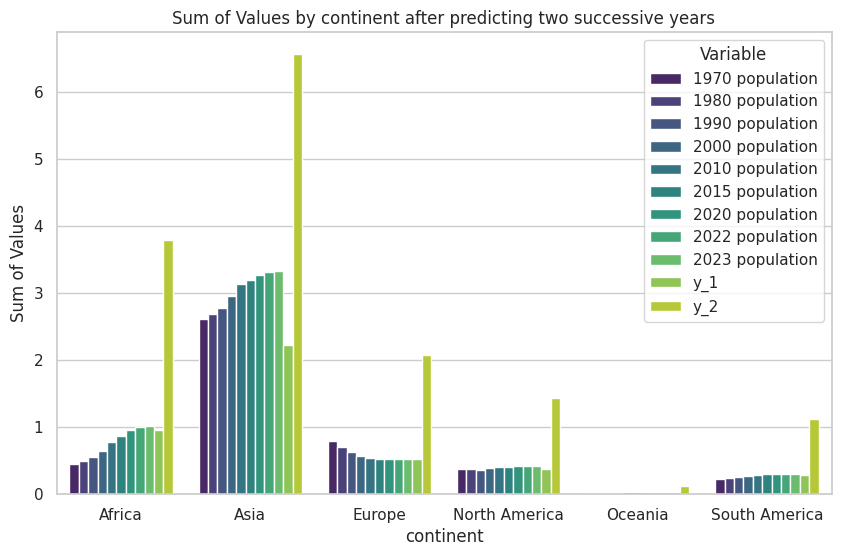

In [16]:
# Make predictions for the test set
predictions = model.predict(X)
# Inverse transform the scaled predictions to get actual values
df[new_f]=predictions
grouped_df = df.groupby('continent').agg({'1970 population':'sum','1980 population':'sum', '1990 population':'sum',
                                            '2000 population':'sum','2010 population':'sum', '2015 population':'sum'
                                           , '2020 population':'sum','2022 population':'sum','2023 population':'sum'
                                          , 'y_1':'sum','y_2':'sum'}).reset_index()
# Melt the DataFrame to make it suitable for Seaborn
melted_df = pd.melt(grouped_df, id_vars='continent', var_name='Variable', value_name='Sum')

# Create a Seaborn bar plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='continent', y='Sum', hue='Variable', data=melted_df, palette='viridis')
plt.title('Sum of Values by continent after predicting two successive years')
plt.xlabel('continent')
plt.ylabel('Sum of Values')
plt.show()